In [4]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt
import matplotlib_fontja
import warnings
import string
import nlplot
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

##### アンケートを分析したい
1. 形態素分析

### アンケート結果の読み込み
###### 参考のアンケート（）

In [5]:
file = './text_questionnaire.xlsx'
df = pd.read_excel(file)
df = df.loc[:,['ID','comment']]
df.head()


,ID,comment
0,1,末永研では燃焼に関して、内舘研では摩擦や物体表面効果など、清水研では金型の研究を見学しました...
1,2,末永研究室では燃焼についての研究をしていた。火を振動させたり固形燃料を使っていたりしていた。...
2,3,様々な分野の研究室を見学したが、なかでも柴田研は大きな企業とも共同研究していると聞き、興味を...
3,4,基礎ゼミナールの第一回目は佐藤研、柴田研、佐々木研、柳岡研を見学して、研究の環境を見ました。...
4,5,佐々木教授、柳岡教授、末永教授の研究室を見学しました。佐々木教授は主に生物工学を研究しており...


In [6]:
comments = df['comment'].dropna().tolist()
# comments

##### 正規表現



In [7]:
# # comments = re.sub('\u3000', '', comments)
# #例えば以下だと、引数に削除したい記号（中黒）、削除後の処理、処理を実行したいデータが格納された変数textに格納される。
# comments = re.sub('「', '', comments)
# comments = re.sub('」', '', comments)
# comments = re.sub('・', '', comments)
# comments = re.sub('（', '', comments)
# comments = re.sub('）', '', comments)

# #処理後には半角スペースを入れたい場合は二番目の引数に' 'と入れる。
# comments = re.sub('\n', ' ', comments)
# comments = re.sub('\\n', '', comments)
# comments = re.sub('\\n', ' ', comments)
tokenizer = Tokenizer()
mecab = MeCab.Tagger('-Owakati')
# 日本語のストップワード
stop_words = set([
    'の', 'に', 'は', 'を', 'た', 'が', 'で', 'て', 'と', 'し', 'れ', 'さ', 'ある', 'いる',
    'も', 'する', 'から', 'な', 'こと', 'として', 'いく', 'これ', 'それ', 'あれ', 'ここ',
    'そこ', 'あそこ', 'そして', 'でも', 'やっぱり', 'さらに', 'また', 'ただ', 'どう',
    'こう', 'そう', 'ああ', 'お', 'よう', 'なぜ', 'なに', 'なんで', 'へ', 'にて', 'より'
])

# テキストの前処理関数
def preprocess_text(text):
    # 小文字化（日本語には関係ないが、一応行う）
    text = text.lower()
    # 句読点の除去
    text = text.translate(str.maketrans('', '', string.punctuation))
    # トークン化とストップワードの除去
    tokens = [token.base_form for token in tokenizer.tokenize(text) if token.surface not in stop_words]
    return ' '.join(tokens)

def mecab_process(text):
      # 句読点の除去
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 形態素解析とストップワードの除去
    tokens = mecab.parse(text).split()
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

##### 形態素解析
アルゴリズムを有する自然言語で書かれている文を、言語において意味を持つ最小の単位(＝形態素)に細分化し、一つひとつの品詞・変化などを判別していく作業のこと


In [8]:
# 全てのコメントに前処理を適用
processed_comments = [preprocess_text(comment) for comment in comments]
processed_comments

['末永 研 燃焼 に関して 、 内舘 研 摩擦 や 物体 表面 効果 など 、 清水 研 金 型 研究 見学 ます 。 実演 、 楽しむ 出来る ます 。 特に 末永 研 溶ける 変形 プラスチック や 浮き上がる 火 など インパクト ある ます 。',
 '末永 研究 室 燃焼 について 研究 いる 。 火 振動 せる たり 固形 燃料 使う いる たり いる 。 内舘 研究 室 トライボロジー について 研究 いる 。 がん ちゃん プラモ 使う いる 。 清水 研究 室 金 型 について 研究 いる 。 継ぎ目 わかる ない 金属 加工 いる 驚く 。',
 '様々 分野 研究 室 見学 、 なかでも 柴田 研 大きな 企業 とも 共同 研究 聞く 、 興味 持つ 。 オープン キャンパス もう一度 見学 行く たい 。',
 '基礎 ゼミナール 第 一 回 目 佐藤 研 、 柴田 研 、 佐々木 研 、 柳 岡 研 見学 、 研究 環境 見る ます 。   先輩 たち 私 たち 研究 内容 紹介 くれる ます 。 その 中 、 一番 興味 佐々木 研 嚥下 研究 です 。 私 大学 進学 理由 、 障害 者 助ける ロボット 作る ため です 。 嚥下 研究 まさに 私 好き もの です 。 将来 、 この 研究 参加 、 自分 目標 達成 たい 思う いる ます 。   、 柴田 研究 室 先輩 質問 とき 、 いる つ この 研究 携わる 決める か 質問 ます 。 先輩 少し 考える 、 大学 入る とき すでに 来る 決める いる 答える ます 。 彼 こんなに 早い 自分 研究 たい 見つける られる 、 私 とても 尊敬 いる ます 。',
 '佐々木 教授 、 柳 岡 教授 、 末永 教授 研究 室 見学 ます 。 佐々木 教授 主 生物 工学 研究 おる 、 その 中 筋 電流 捉える 装置 非常 興味深い です 。 この 装置 、 嚥下 障害 人々 簡単 食事 摂る れる 支援 できる ます 。 柳 岡 教授 流体 力学 に関する 研究 行う いる ます 。 末永 教授 主 燃焼 に関する 研究 おる 、 燃料 や エンジン など 扱う いる ます 。',
 '佐々木   医学 × 工学 珍しい 成績 点 35 以上   飲み込む 、 

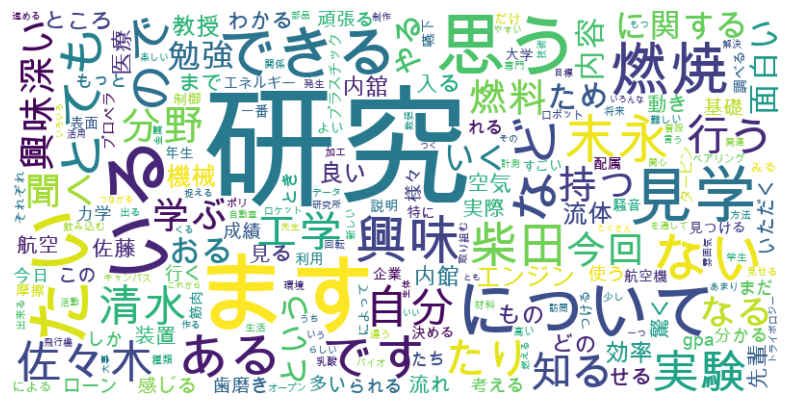

In [14]:
# 単語の頻度分析
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_comments)
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Word Cloudの作成
wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
mecab_process_comments = [mecab_process(comment) for comment in comments]
mecab_process_comments

['末永 研 燃焼 関し 、 内舘 研 摩擦 や 物体 表面 効果 など 、 清水 研 金型 研究 見学 まし 。 実演 、 楽しむ 出来 まし 。 特に 末永 研 溶け 変形 プラスチック や 浮き上がる 火 など インパクト あり まし 。',
 '末永 研究 室 燃焼 つい 研究 い 。 火 振動 せ たり 固形 燃料 使っ い たり い 。 内舘 研究 室 トライボロジー つい 研究 い 。 がん ちゃん プラモ 使っ い 。 清水 研究 室 金型 つい 研究 い 。 継ぎ目 わから ない 金属 加工 い 驚い 。',
 '様々 分野 研究 室 見学 、 なか 柴田 研 大きな 企業 とも 共同 研究 聞き 、 興味 持っ 。 オープン キャンパス もう 一 度 見学 行き たい 。',
 '基礎 ゼミナール 第 一 回 目 佐藤 研 、 柴田 研 、 佐々木 研 、 柳 岡 研 見学 、 研究 環境 見 まし 。 先輩 たち 私 たち 研究 内容 紹介 くれ まし 。 その 中 、 一番 興味 佐々木 研 嚥下 研究 です 。 私 大学 進学 理由 、 障害 者 助ける ロボット 作る ため です 。 嚥下 研究 まさに 私 好き もの です 。 将来 、 この 研究 参加 、 自分 目標 達成 たい 思っ い ます 。 、 柴田 研究 室 先輩 質問 とき 、 いつ この 研究 携わる 決め か 質問 まし 。 先輩 少し 考え 、 大学 入る とき すでに 来る 決め い 答え まし 。 彼 こんな 早く 自分 研究 たい 見つけ られ 、 私 とても 尊敬 い ます 。',
 '佐々木 教授 、 柳 岡 教授 、 末永 教授 研究 室 見学 まし 。 佐々木 教授 主に 生物 工学 研究 おり 、 その 中 筋電 流 捉える 装置 非常 興味 深かっ です 。 この 装置 、 嚥下 障害 人々 簡単 食事 摂れる 支援 でき ます 。 柳 岡 教授 流体 力学 関する 研究 行っ い ます 。 末永 教授 主に 燃焼 関する 研究 おり 、 燃料 や エンジン など 扱っ い ます 。',
 '佐々木 医学 × 工学 珍しい 成績 点 35 以上 飲み込ん 、 筋肉 電流 捉え 画像 生成 。 人 飲み込む 手伝う 気管 誤 入 歯磨き 医療 スタッ

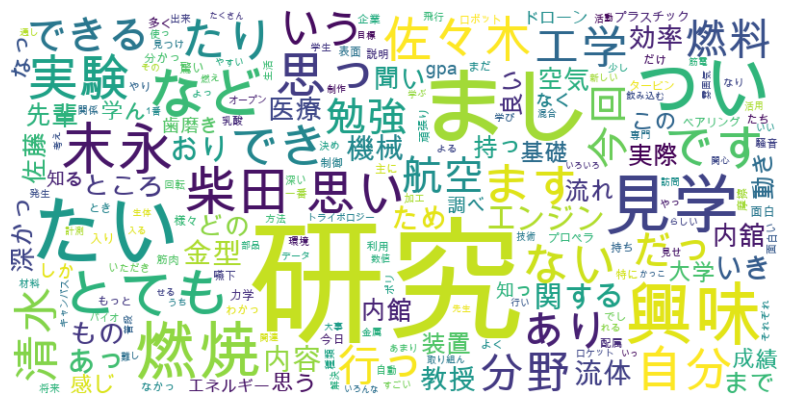

In [15]:
# 単語の頻度分析
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mecab_process_comments)
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Word Cloudの作成
wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
wordcloud

##### 形態素解析
アルゴリズムを有する自然言語で書かれている文を、言語において意味を持つ最小の単位(＝形態素)に細分化し、一つひとつの品詞・変化などを判別していく作業のこと